## Предсказание оттока клиенов банка. EDA
***

Информация о датасете с Kaggle:

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

<br/>Customer ID: A unique identifier for each customer
<br/>Surname: The customer's surname or last name
<br/>Credit Score: A numerical value representing the customer's credit score
<br/>Geography: The country where the customer resides (France, Spain or Germany)
<br/>Gender: The customer's gender (Male or Female)
<br/>Age: The customer's age.
<br/>Tenure: The number of years the customer has been with the bank
<br/>Balance: The customer's account balance
<br/>NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
<br/>HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
<br/>IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
<br/>EstimatedSalary: The estimated salary of the customer
<br/>Exited: Whether the customer has churned (1 = yes, 0 = no) 

<br/> Exited - целевая переменная
<br/>Здесь показан предварительный анализ признаков.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Загрузка и предварительная обработка

In [2]:
# загрузка в датафрейм и первый взгляд на данные
data = pd.read_csv('Datasets/Churn_modelling.csv', sep=',')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [4]:
# при первом взгляде видно, что в данных есть повторы и есть колонка с индексом. Уберем повторы и установим колонку RowNumber
# индексом.

data = data.drop_duplicates().set_index('RowNumber')
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1


In [5]:
# Посмотрим, есть ли значения NaN в колонках и отобразми их количество в каждой колонке:
pd.DataFrame(data.isna().sum(axis=0), columns=['NaN count']).transpose()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
NaN count,0,0,0,1,0,1,0,0,0,1,1,0,0


In [6]:
# так как данных с NaN немного, можно выбросить строчки, где сидит со значениями NaN. 
# При обработке в пайплайне можно для категориальных признаков взять 0, для численных - среднее
print(f'Размер до удаления NaN: {data.shape}')
data = data.dropna()
print(f'Размер после удаления NaN: {data.shape}')

Размер до удаления NaN: (10000, 13)
Размер после удаления NaN: (9996, 13)


In [7]:
# вывод основных сведений в колонках
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,1.569095e+07,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,7.192840e+04,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562855e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,1.575323e+07,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


***
### Построение распределений по признакам и класса таргета

In [8]:
# баланс Классов:
data['Exited'].value_counts()

0    7959
1    2037
Name: Exited, dtype: int64

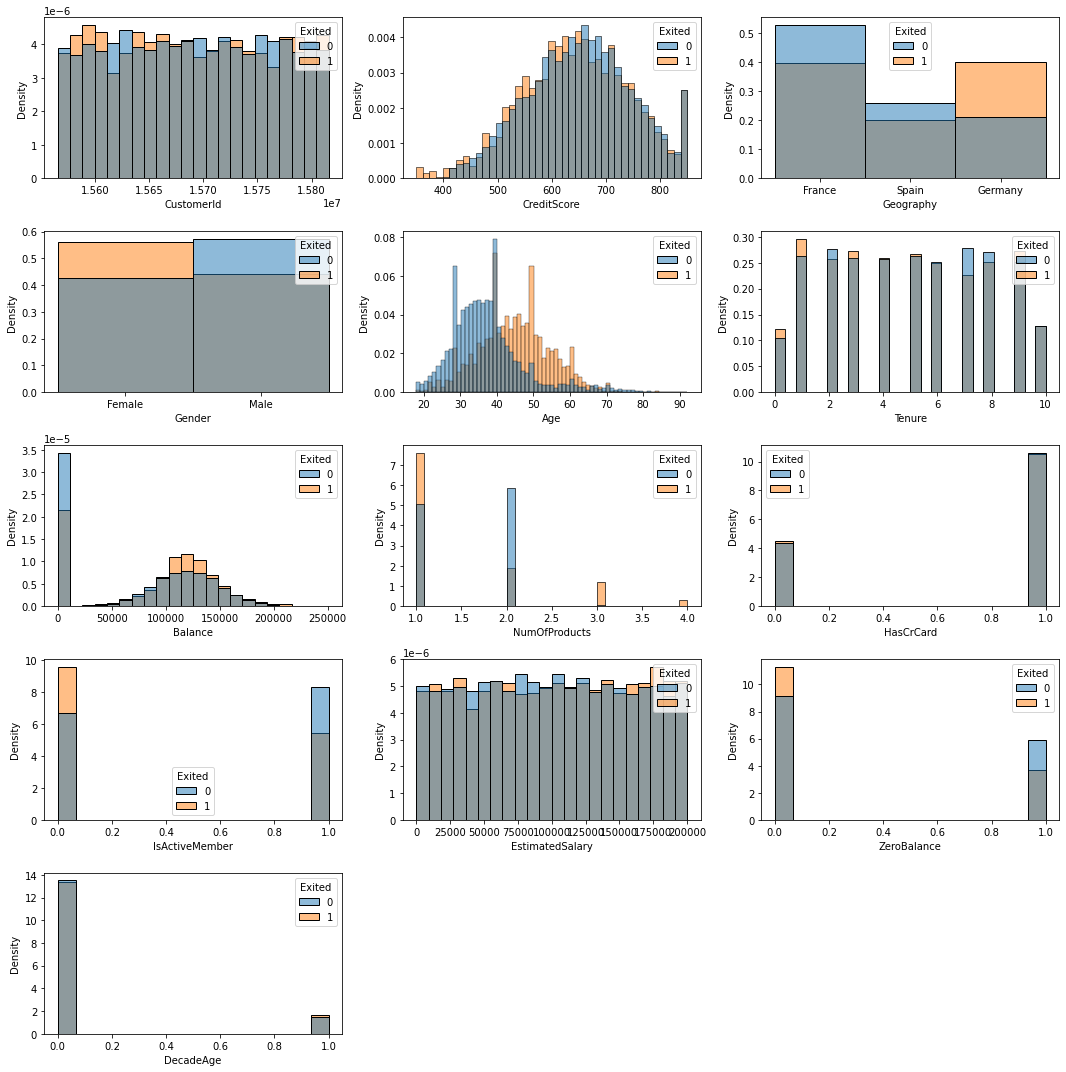

In [40]:
## построение гистограмм распределений:
feature_columns = list(data.columns)
# Выкинули колонки с фамилией и целевую
feature_columns = [col for col in feature_columns if col not in ['Surname', 'Exited']]
target_column = 'Exited'

n_cols = 3
n_rows = int(np.ceil(len(feature_columns)/n_cols))

fig = plt.figure(figsize=(n_cols*5, n_rows*3))
#fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))
for ix, col in enumerate(feature_columns):
    ax = fig.add_subplot(n_rows, n_cols, ix+1)
    sns.histplot(ax=ax, data=data, x=col, hue='Exited', stat="density", common_norm=False)
    
fig.tight_layout()

#### Выводы из распредений (на глаз):
<br/>1. Номер CustomerId не влияет на уход. (Возможно, там была какая нибудь неявная зависимость номера от географии или времени или еще чего нибудь...)
<br/>2. В Кредитном рейтинге есть смещение распределения доли ушедших с меньшим рейтингом. 
<br/>3. Чаще уходили в Германии, реже во Франции.
<br/>4. Доля ушедших женщин выще доли мужчин.
<br/>5. Есть отличия в возрасте Age: более взрослые более склонны к уходу. Кроме того в распределениях имеются выбросы по возрастам: 30, 40, 50, 60 лет.
<br/>6. По длительности пребывания клиента в банке Tenure есть слабые отличия: более склонны к уходу те кто мало работают с банком, а менее склонны те кто долго (отличия не то чтоб сильно выражены, может и шум)
<br/>7. По балансу на счете Balance есть выраженная колонка людей с нулевым балансом, по которой есть значительное расхождения по долям. Стоит выделить в отдельный признак людей с нулевым балансом и рассмотреть его. Кроме того, среди ушедших выше доля со средним балансом.
<br/>8. По количеству продуктов NumOfProducts: почти не представлены оставшиеся с количеством продуктов 3, 4. А среди отказавшихся такие доли достаточно хорошо выражены.
<br/>9. Среди держателей кредитных карт HasCrCard нет отличий в долях классов.
<br/>10. Среди неактивных людей IsActiveMember доля ушедших выше.
<br/>11. По заработку EstimatedSalary нет явных отличий. Интересно, что распределения равномерные, а не нормальные. Возможно, колонка заработка както закодирована.

#### Дополнительные распределения по числовым признакам
Посмотрим, выделяются ли какие либо закономерности в распределении классов при группам из двух различных числовых и категориальных признаков. Возможно, получится выделить какие любо кластеры с выраженным преобладанием одного из классов.

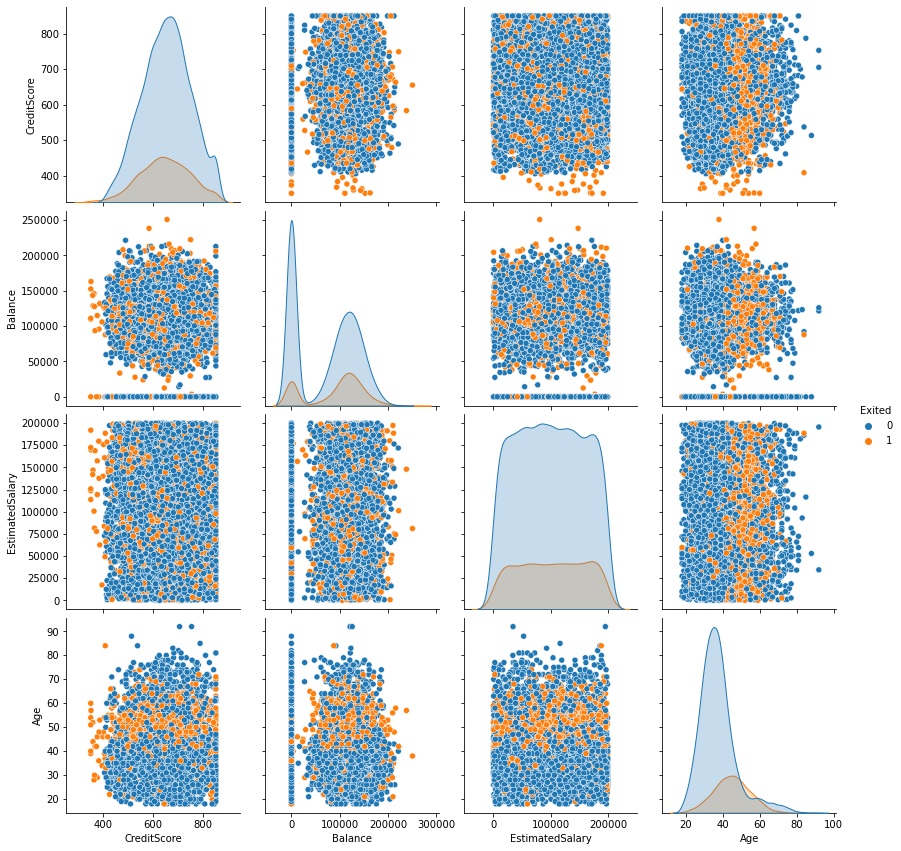

In [58]:

sns.pairplot(data[['CreditScore', 'Balance', 'EstimatedSalary', 'Age', 'Exited']], height=3, hue="Exited")

Среди числовых признаков явных кластеров с преобладанием класса в группах признаков не выявлено. 

#### Дополнительные распределения по категориальным признакам
Посмотрим, выделяются ли какие либо закономерности в распределении классов при группам из двух различных числовых и категориальных признаков. Возможно, получится выделить какие любо кластеры с выраженным преобладанием одного из классов.

In [39]:
# функция для построения распеределений классов при разбиеннии на группы признаков
def target_vs_all_plot(data, target_col, vs_cols, title):
    n_cols = 2
    n_rows = int(np.ceil(len(vs_cols)/n_cols))
    fig = plt.figure(figsize=(n_cols*8, n_rows*4))
    fig.suptitle(title, fontsize=18)

    for ix, col in enumerate(vs_cols):
        ax = fig.add_subplot(n_rows, n_cols, ix+1)
        if data[col].nunique() < 20:
            sns.stripplot(ax=ax, data=data, y=col, x=target_col, hue='Exited', alpha=0.3)
        else:
            sns.violinplot(ax=ax, data=data, y=col, x=target_col, hue='Exited')

    fig.tight_layout()
    

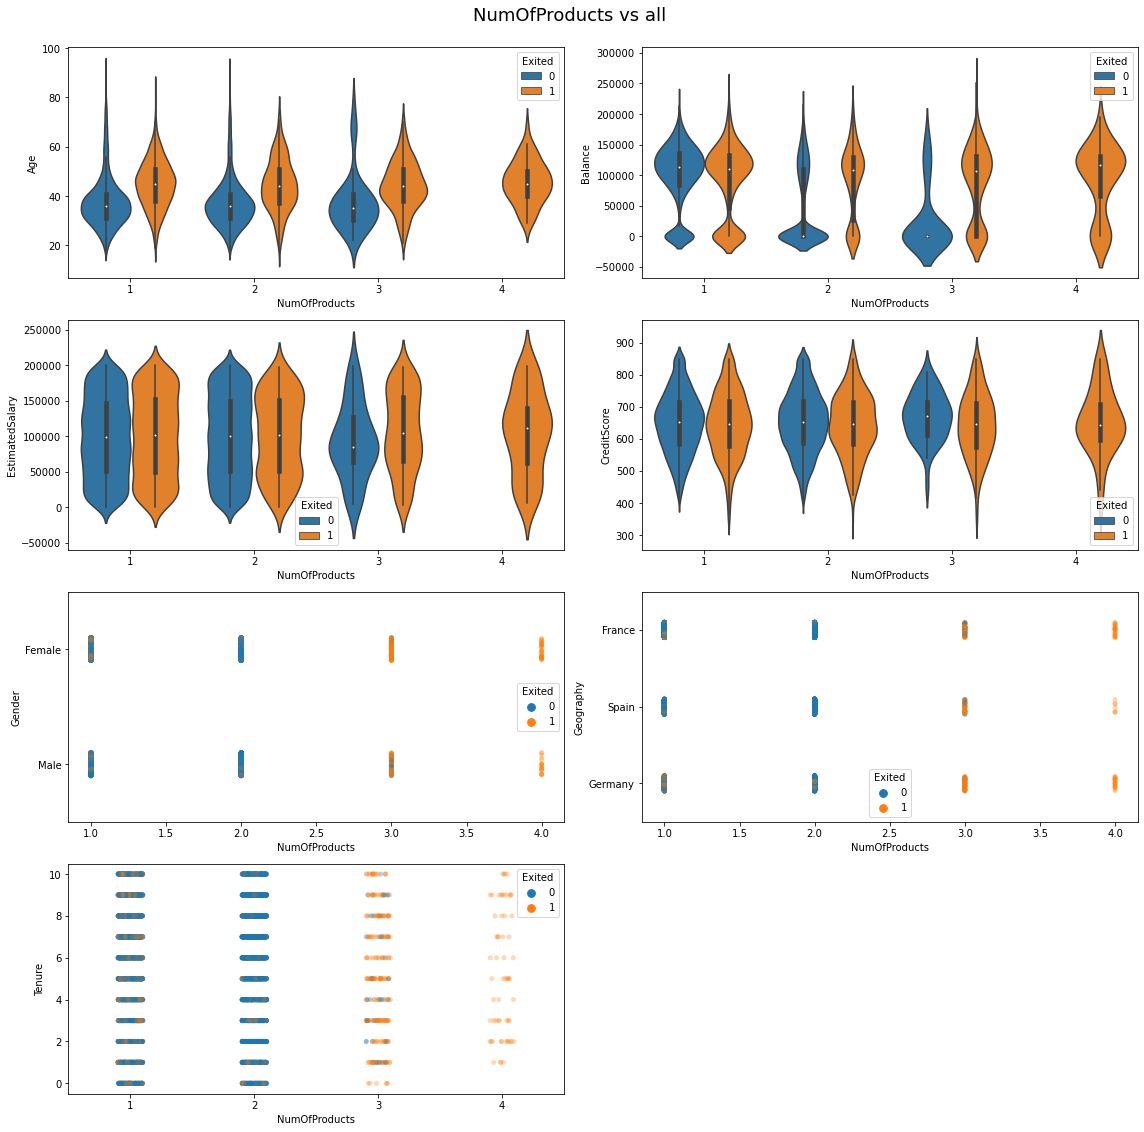

In [33]:
# NumOfProducts vs other

cols = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Gender', 'Geography', 'Tenure']
target_col = 'NumOfProducts'

target_vs_all_plot(data, target_col, cols, 'NumOfProducts vs all \n')

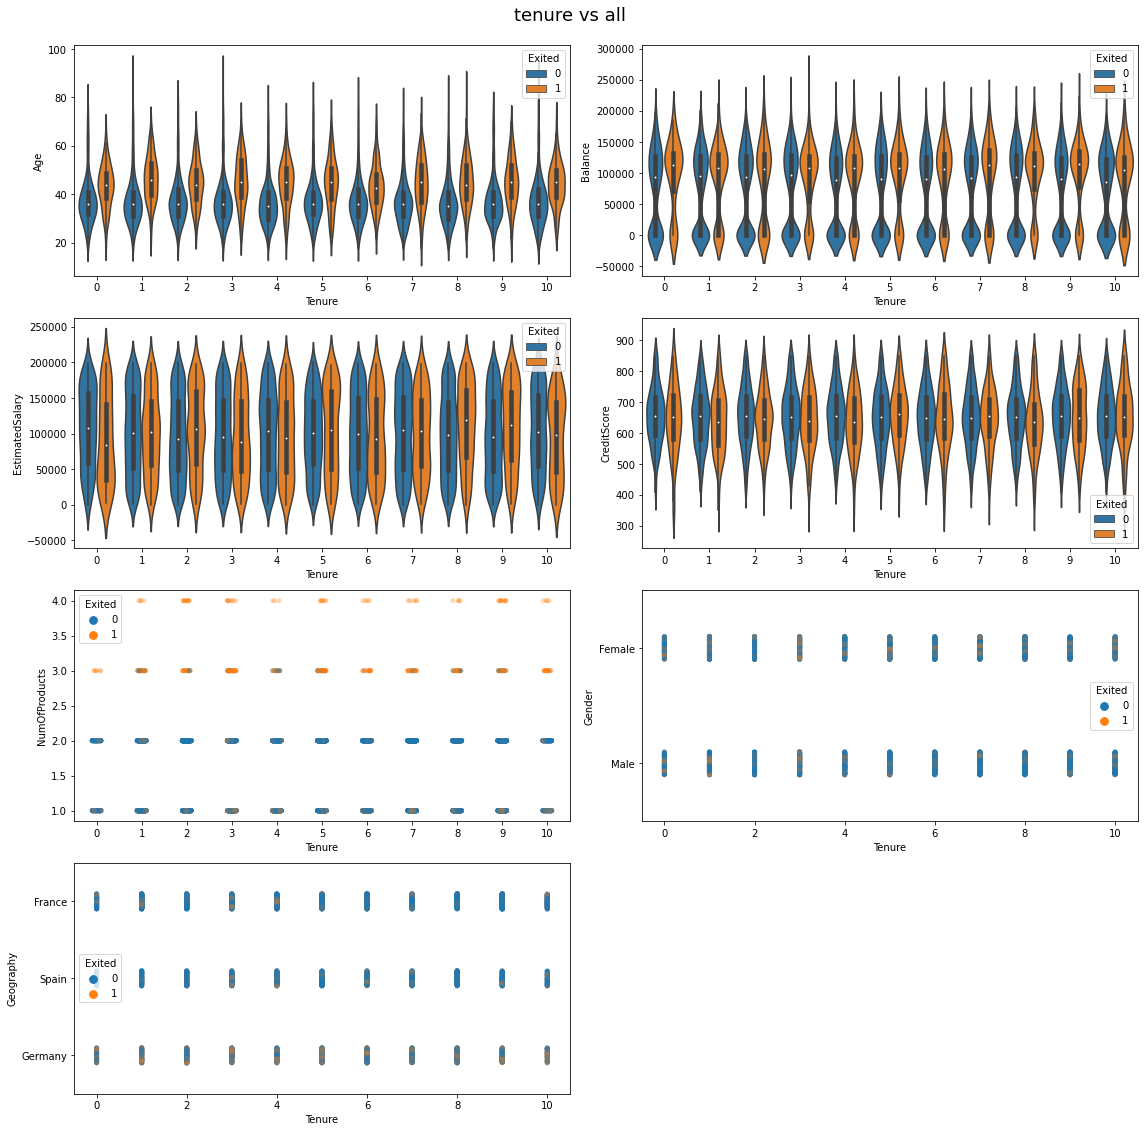

In [34]:
# Tenure vs other
cols = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts', 'Gender', 'Geography']
target_col = 'Tenure'

target_vs_all_plot(data, target_col, cols, 'tenure vs all \n')

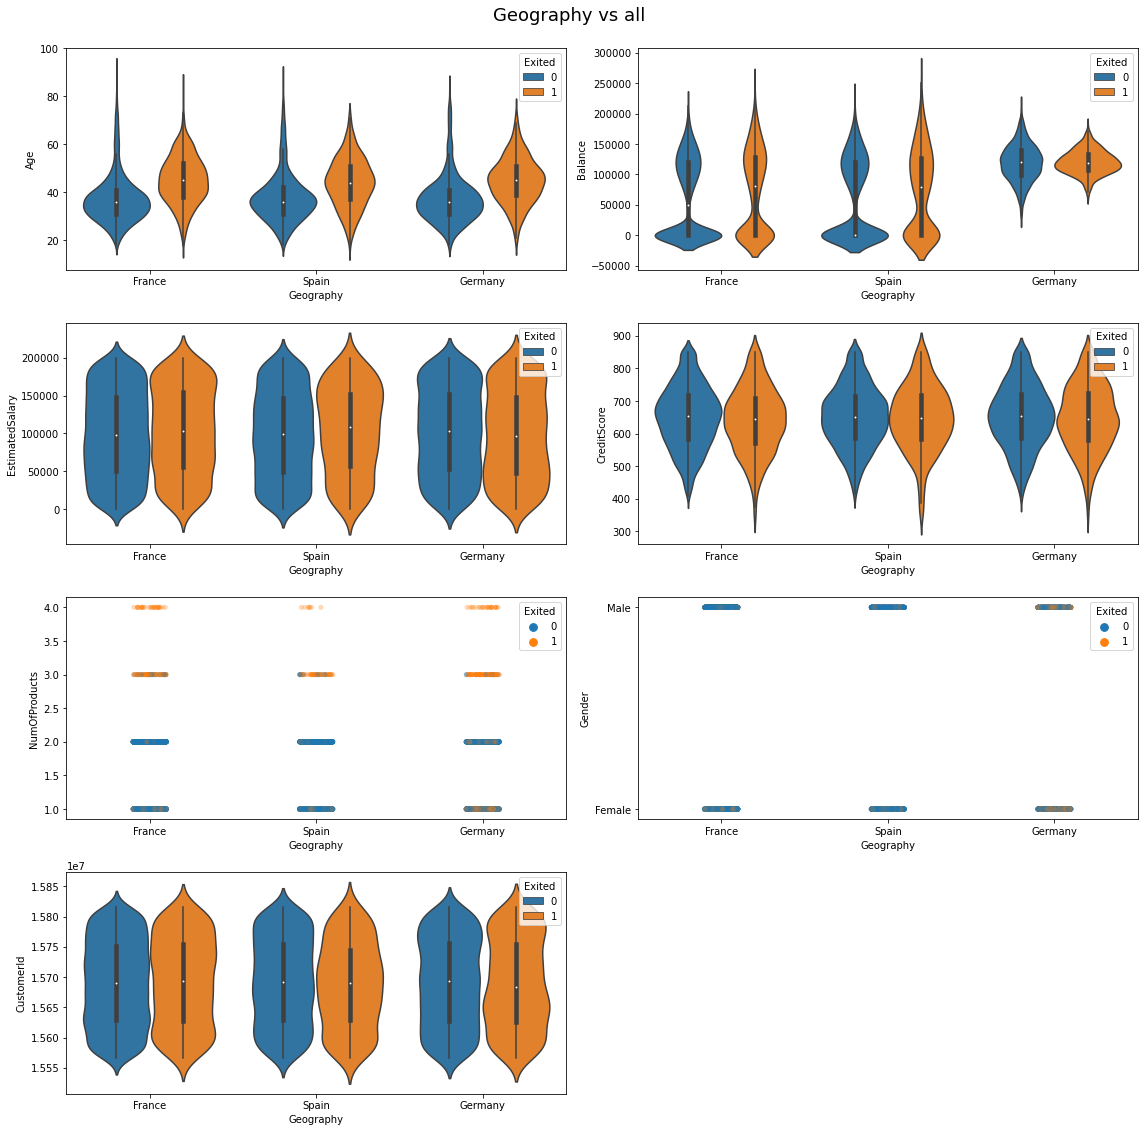

In [35]:
# Geography vs other
cols = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts', 'Gender', 'CustomerId']
target_col = 'Geography'

target_vs_all_plot(data, target_col, cols, 'Geography vs all \n')

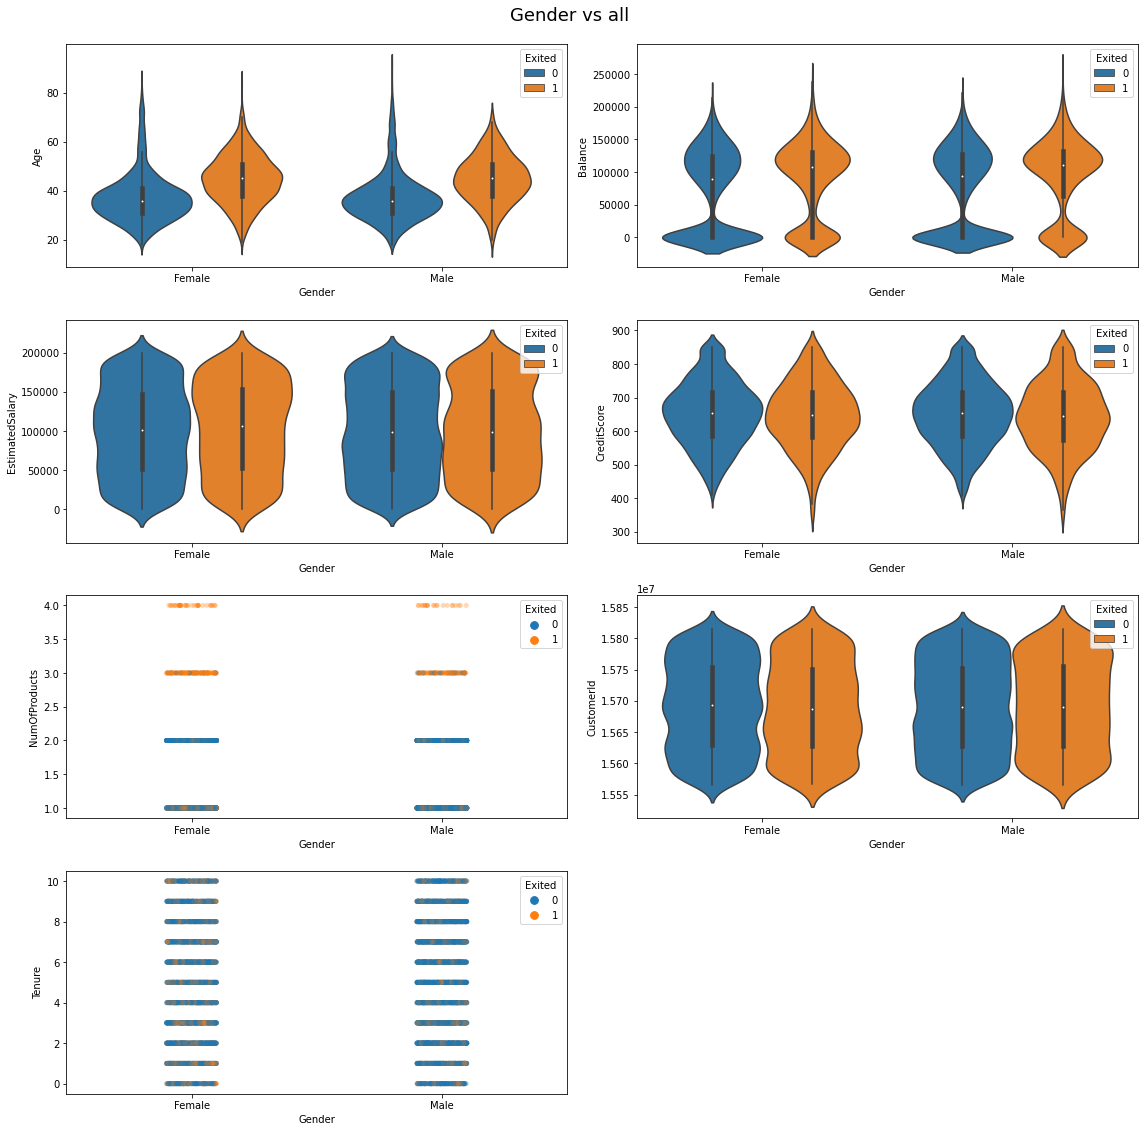

In [36]:
# Gender vs other
cols = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts', 'CustomerId', 'Tenure']
target_col = 'Gender'

target_vs_all_plot(data, target_col, cols, 'Gender vs all \n')

При построении категориальных признаков между собой никаких новых кластеров по классам не обнаружено. Все наблюдаемые закономерности видны и при распредлениях одного признака по классам.

#### Распределения для сгенерированных признаках
Сгенерируем два признака: люди с нулевым балансом и люди с кратным 10 возрастом и посмотрим для них распределения по классам.

In [16]:
data['ZeroBalance'] = (data['Balance'] == 0).astype(int)
data['DecadeAge'] = (data['Age'] % 10 == 0).astype(int)

C:\Users\Dmitry\AppData\Local\Temp/ipykernel_26064/3863463188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ZeroBalance'] = (data['Balance'] == 0).astype(int)
C:\Users\Dmitry\AppData\Local\Temp/ipykernel_26064/3863463188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DecadeAge'] = (data['Age'] % 10 == 0).astype(int)


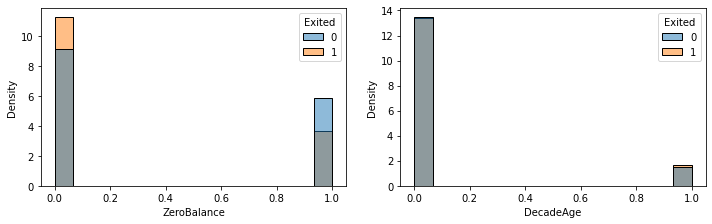

In [17]:
n_cols = 2
n_rows = int(np.ceil(len(feature_columns)/n_cols))

feature_columns = ['ZeroBalance', 'DecadeAge']

fig = plt.figure(figsize=(n_cols*5, n_rows*3))
#fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))
for ix, col in enumerate(feature_columns):
    ax = fig.add_subplot(n_rows, n_cols, ix+1)
    sns.histplot(ax=ax, data=data, x=col, hue='Exited', stat="density", common_norm=False)
    
fig.tight_layout()

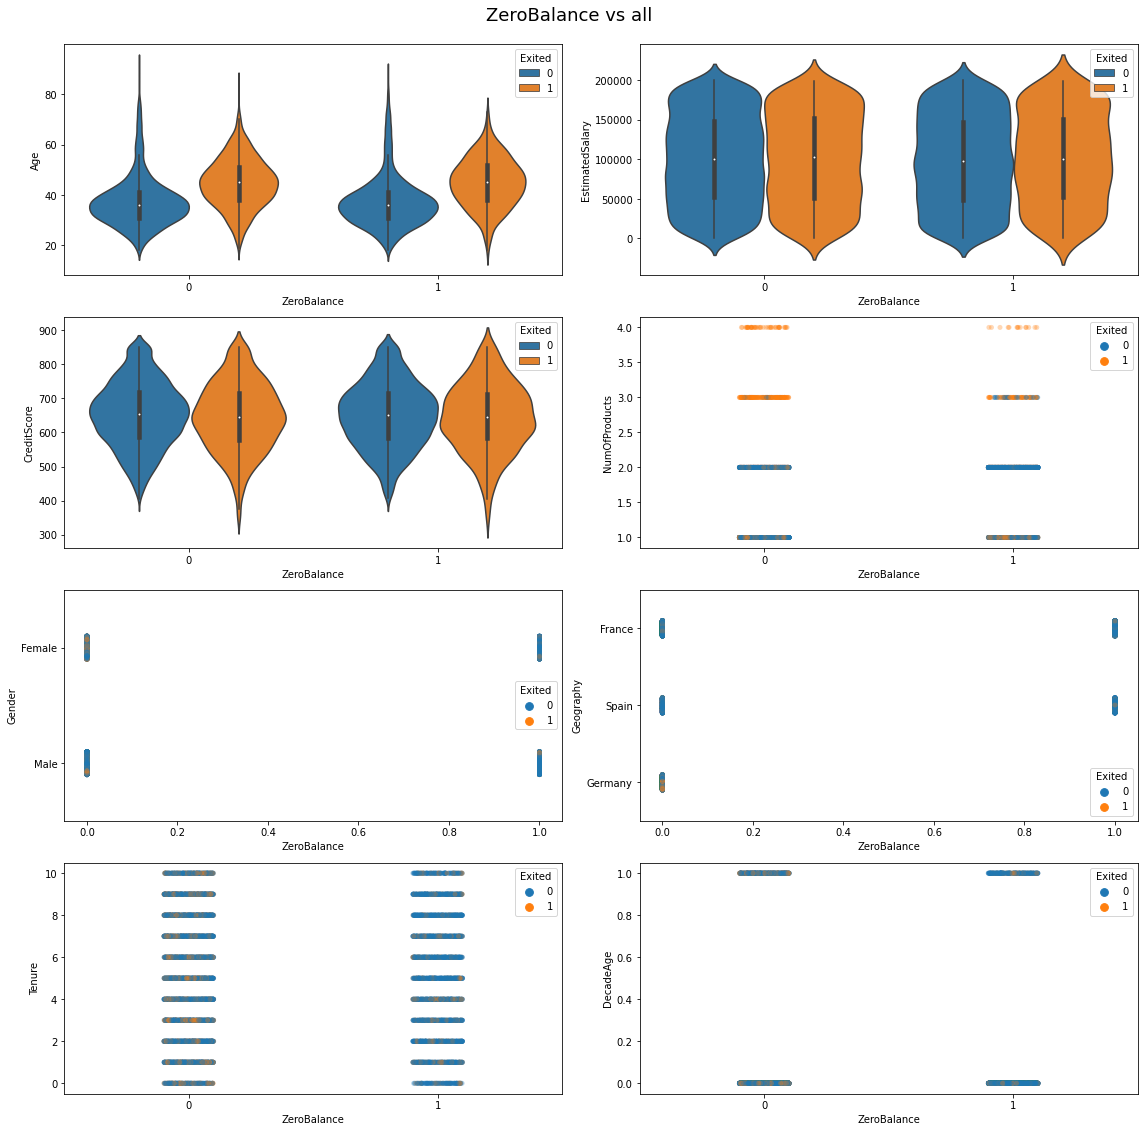

In [37]:
# ZeroBalance vs other

cols = ['Age', 'EstimatedSalary', 'CreditScore', 'NumOfProducts', 'Gender', 'Geography', 'Tenure', 'DecadeAge']
target_col = 'ZeroBalance'

target_vs_all_plot(data, target_col, cols, 'ZeroBalance vs all \n')

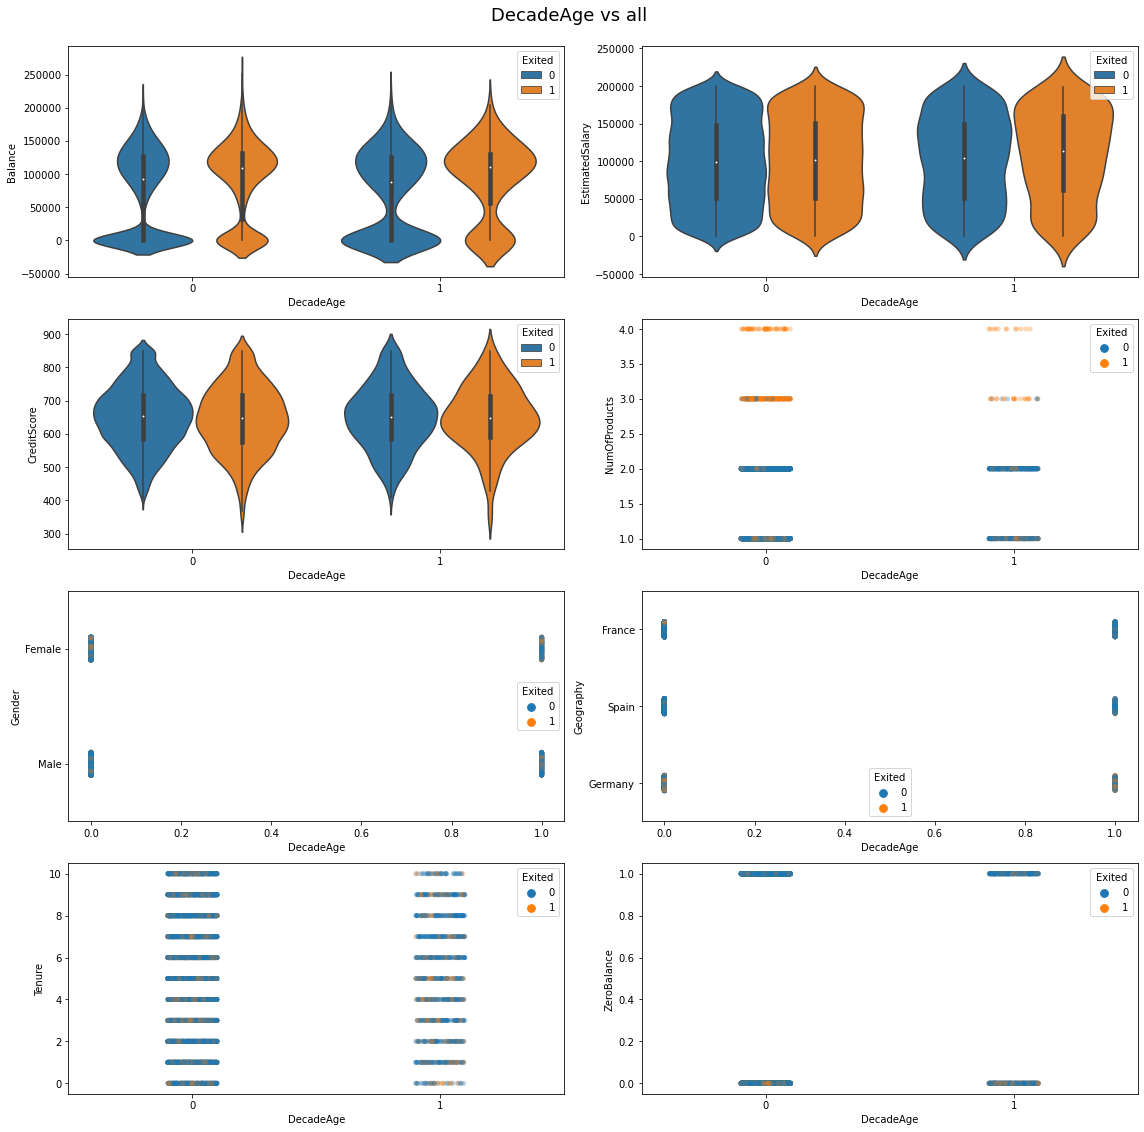

In [38]:
# ZeroBalance vs other

cols = ['Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts', 'Gender', 'Geography', 'Tenure', 'ZeroBalance']
target_col = 'DecadeAge'


target_vs_all_plot(data, target_col, cols, 'DecadeAge vs all \n')

***
### Выводы по EDA
  * Некоторые признаки (Аge, Country, NumOfProducts...) показывают заметные отличия в распределении двух классов и могут дать сильный прирост качества в моделях.
  * Каких либо кластеров распределений классов при группировках признаков подвое не обнаружено
  * На основании закономерностей сгенерировали два признака: 'DecadeAge' и 'ZeroBalance'
  * Можно еще поисследовать "бесполезные" признаки. Например - попробовать определить национальность по фамилии и сделать категориальный признак национальности, или посмотреть внимательнее на CustomerId 